In [ ]:
                                                  # Logistic Regression


 #Attribute information For bank dataset

   #Input variables:
   # bank client data:
   #1 - age (numeric)
   #2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
    #                                   "blue-collar","self-employed","retired","technician","services")
   #3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   #4 - education (categorical: "unknown","secondary","primary","tertiary")
   #5 - default: has credit in default? (binary: "yes","no")
   #6 - balance: average yearly balance, in euros (numeric)
   #7 - housing: has housing loan? (binary: "yes","no")
   #8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   #9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  #10 - day: last contact day of the month (numeric)
  #11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  #12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  #13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  #14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  #15 - previous: number of contacts performed before this campaign and for this client (numeric)
  #16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #Output variable (desired target):
  #17 - y - has the client subscribed a term deposit? (binary: "yes","no")

#8. Missing Attribute Values: None
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not
#Binomial ("yes" or "no")


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/bank-full.csv')

# Define features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [3]:
# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [4]:
# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [5]:

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
# Define the pipeline with a simpler DecisionTreeClassifier
pipe_simple = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [7]:
# Simplified hyperparameter grid for DecisionTreeClassifier
param_grid_simple = {
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [ ]:
# Perform cross-validation
grid_simple = GridSearchCV(pipe_simple, param_grid_simple, cv=5)
grid_simple.fit(X, y)

In [9]:
# Print the best parameters
print("Best Hyperparameters:", grid_simple.best_params_)

# Print the best cross-validated score
print("Age Prediction Using Classifier:", grid_simple.best_score_)

Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Age Prediction Using Classifier: 0.6948055620516718


In [ ]:
# Map 'yes' to 1 and 'no' to 0
y_binary = y.map({'yes': 1, 'no': 0})

In [12]:
# Get predicted probabilities
y_pred_prob = grid_simple.predict_proba(X)[:, 1]

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

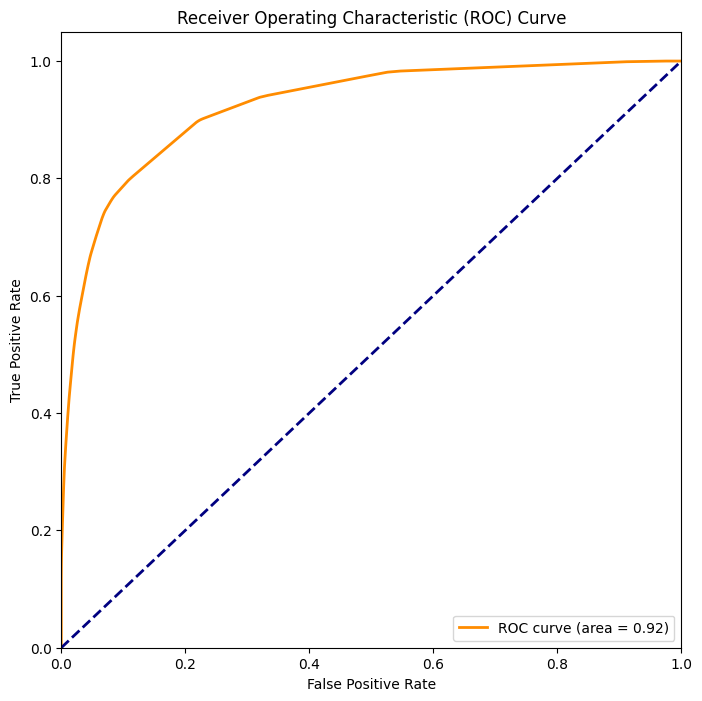

In [14]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()